In [1]:
import matplotlib.pyplot as plt
import torch
from autoencoder import ae_encoding
from pca import pca_encoding

In [7]:
# Data paths
# "/Users/dcac/Data/Soft_Sensors/debutanizer.csv", "/Users/dcac/Data/Soft_Sensors/SRU1.csv", "/Users/dcac/Data/UCI/air.csv",
# "/Users/dcac/Data/UCI/bike.csv", "/Users/dcac/Data/UCI/wine_white.csv" "/Users/dcac/Data/UCI/gas_turbine_co.csv"
data = "/Users/dcac/Data/Soft_Sensors/debutanizer.csv"

In [8]:
encoded_features_ae_sgd = ae_encoding(path_to_data=data, encoding_dim=2, learning_rate=0.01, num_epochs=1000, batch_size=32, optimizer=torch.optim.SGD, seed=0)
encoded_features_ae_adam = ae_encoding(path_to_data=data, encoding_dim=2, learning_rate=0.01, num_epochs=1000, batch_size=32, optimizer=torch.optim.Adam, seed=0)
encoded_features_pca = pca_encoding(path_to_data=data, encoding_dim=2, seed=0)

Training: 100%|██████████| 1000/1000 [00:15<00:00, 66.40it/s, loss=0.005260]


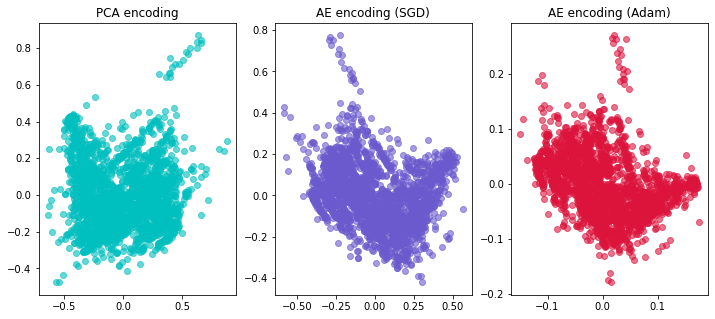

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5))
axs[0].scatter(encoded_features_pca[:, 0], encoded_features_pca[:, 1], color="c", alpha=0.6)
axs[0].set_title('PCA encoding')
axs[1].scatter(encoded_features_ae_sgd[:, 0], encoded_features_ae_sgd[:, 1], color="slateblue", alpha=0.6)
axs[1].set_title('AE encoding (SGD)')
axs[2].scatter(encoded_features_ae_adam[:, 0], encoded_features_ae_adam[:, 1], color="crimson", alpha=0.6)
axs[2].set_title('AE encoding (Adam)')
plt.show()